<a href="https://colab.research.google.com/github/Joan-yy/AnxietyLevelPrediction/blob/main/IDS_SVM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Untuned SVM Model


Saving enhanced_anxiety_dataset.csv to enhanced_anxiety_dataset (15).csv
Accuracy: 0.8398462524023063
F1 Score (Macro): 0.8398675781251222
ROC-AUC Score (Macro): 0.944223383067185

Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99      1040
         Low       0.77      0.76      0.77      1041
      Medium       0.76      0.77      0.76      1041

    accuracy                           0.84      3122
   macro avg       0.84      0.84      0.84      3122
weighted avg       0.84      0.84      0.84      3122



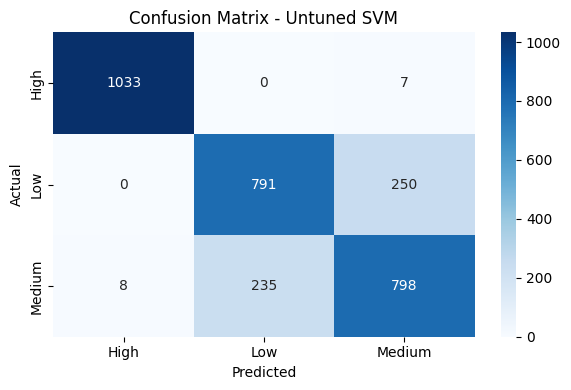

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install required packages
!pip install scikit-learn pandas matplotlib seaborn joblib imbalanced-learn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import joblib
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import files

# Step 3: Upload dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Step 4: Convert Anxiety Score to Category
def map_anxiety_level(score):
    if score <= 3:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

df['AnxietyCategory'] = df['Anxiety Level (1-10)'].apply(map_anxiety_level)
df.drop(columns=['Anxiety Level (1-10)'], inplace=True)

# Step 5: Encode categorical variables
categorical_cols = ['Gender', 'Smoking', 'Family History of Anxiety',
                    'Dizziness', 'Medication', 'Recent Major Life Event', 'AnxietyCategory']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
class_names = label_encoders['AnxietyCategory'].classes_

# One-hot encode Occupation
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# Step 6: Feature engineering (focused interactions)
df['Occupation_Smoking'] = df['Smoking'] * df.filter(like='Occupation_').sum(axis=1)
df['Gender_Medication'] = df['Gender'] + df['Medication']
df['Smoking_FamilyHistory'] = df['Smoking'] * df['Family History of Anxiety']
df['Dizziness_LifeEvent'] = df['Dizziness'] * df['Recent Major Life Event']
df['Stress_Heart'] = df['Stress Level (1-10)'] * df['Heart Rate (bpm)']
df['Caffeine_Sleep'] = df['Caffeine Intake (mg/day)'] / (df['Sleep Hours'] + 1)
df['Physical_Activity_Alcohol'] = df['Physical Activity (hrs/week)'] * df['Alcohol Consumption (drinks/week)']
df['Therapy_Diet'] = df['Therapy Sessions (per month)'] * df['Diet Quality (1-10)']

# Step 7: Split features and target
X = df.drop(columns=['AnxietyCategory'])
y = df['AnxietyCategory']

# Step 8: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Apply SMOTE with class balancing
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 10: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 11: Train SVM (non-tuned, poly kernel)
svm_model = SVC(kernel='poly', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Step 12: Predict and evaluate
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)

# ✅ FIXED: Binarize numeric labels directly (no re-encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Step 13: Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score (Macro): {f1_score(y_test, y_pred, average='macro')}")
print(f"ROC-AUC Score (Macro): {roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Step 14: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Untuned SVM')
plt.tight_layout()
plt.show()

# Tuned SVM Model

Saving enhanced_anxiety_dataset.csv to enhanced_anxiety_dataset.csv
Accuracy: 0.8401665598975016
F1 Score (Macro): 0.8404063282494563
ROC-AUC Score (Macro): 0.9478031114940362

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99      1040
         Low       0.77      0.76      0.77      1041
      Medium       0.76      0.77      0.76      1041

    accuracy                           0.84      3122
   macro avg       0.84      0.84      0.84      3122
weighted avg       0.84      0.84      0.84      3122



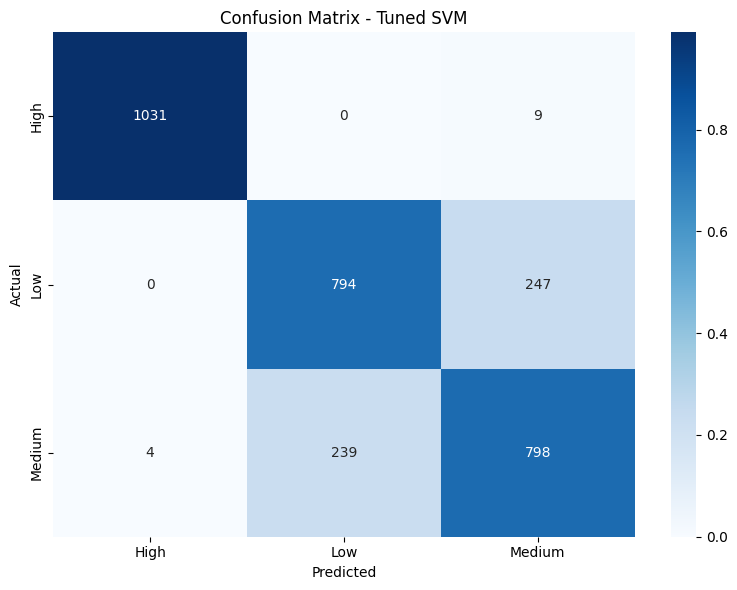

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install required packages
!pip install scikit-learn pandas matplotlib seaborn joblib imbalanced-learn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import joblib
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from google.colab import files

# Step 3: Upload dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Step 4: Map Anxiety Level (1–10) to Low/Medium/High
def map_anxiety_level(score):
    if score <= 3:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

df['AnxietyCategory'] = df['Anxiety Level (1-10)'].apply(map_anxiety_level)
df.drop(columns=['Anxiety Level (1-10)'], inplace=True)

# Step 5: Encode categorical variables
categorical_cols = ['Gender', 'Smoking', 'Family History of Anxiety',
                    'Dizziness', 'Medication', 'Recent Major Life Event', 'AnxietyCategory']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
class_names = label_encoders['AnxietyCategory'].classes_

# One-hot encode Occupation
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# Step 6: Feature engineering
df['Occupation_Smoking'] = df['Smoking'] * df.filter(like='Occupation_').sum(axis=1)
df['Gender_Medication'] = df['Gender'] + df['Medication']
df['Smoking_FamilyHistory'] = df['Smoking'] * df['Family History of Anxiety']
df['Dizziness_LifeEvent'] = df['Dizziness'] * df['Recent Major Life Event']
df['Stress_Heart'] = df['Stress Level (1-10)'] * df['Heart Rate (bpm)']
df['Caffeine_Sleep'] = df['Caffeine Intake (mg/day)'] / (df['Sleep Hours'] + 1)
df['Physical_Activity_Alcohol'] = df['Physical Activity (hrs/week)'] * df['Alcohol Consumption (drinks/week)']
df['Therapy_Diet'] = df['Therapy Sessions (per month)'] * df['Diet Quality (1-10)']

# Step 7: Split features and target
X = df.drop(columns=['AnxietyCategory'])
y = df['AnxietyCategory']

# Step 8: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: SMOTE for class balancing
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 10: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 11: Hyperparameter tuning with GridSearchCV
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # Only used for 'poly'
}
svm = SVC(probability=True, class_weight='balanced', random_state=42)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)
svm_model = grid.best_estimator_

# Step 12: Predict and evaluate
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # For ROC-AUC

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score (Macro): {f1_score(y_test, y_pred, average='macro')}")
print(f"ROC-AUC Score (Macro): {roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Step 13: Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned SVM')
plt.tight_layout()
plt.show()

# Step 15: Save model and features
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(X.columns.tolist(), 'svm_model_features.pkl')
files.download('svm_model.pkl')
files.download('svm_model_features.pkl')
